In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

**Downloading dataset form kaggle**

In [ ]:
!kaggle datasets download -d l33tc0d3r/indian-food-classification

 99% 1.46G/1.48G [00:09<00:00, 240MB/s]
100% 1.48G/1.48G [00:09<00:00, 161MB/s]


**Extracting zip file**

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/indian-food-classification.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf

**loading dataset**

In [ ]:
image_size=(224,224)
Batch_size=32
train_ds=tf.keras.utils.image_dataset_from_directory(
    'Food Classification',
    shuffle=True,
    image_size=image_size,
    batch_size=Batch_size,
    validation_split=(0.2),
    subset='training',
    seed=123
)

image_size=(224,224)
Batch_size=32
validation_ds=tf.keras.utils.image_dataset_from_directory(
    'Food Classification',
    shuffle=True,
    image_size=image_size,
    batch_size=Batch_size,
    validation_split=(0.2),
    subset='validation',
    seed=123
)

Found 6269 files belonging to 20 classes.
Using 5016 files for training.
Found 6269 files belonging to 20 classes.
Using 1253 files for validation.


In [ ]:
classes=train_ds.class_names

In [ ]:
classes

['burger',
 'butter_naan',
 'chai',
 'chapati',
 'chole_bhature',
 'dal_makhani',
 'dhokla',
 'fried_rice',
 'idli',
 'jalebi',
 'kaathi_rolls',
 'kadai_paneer',
 'kulfi',
 'masala_dosa',
 'momos',
 'paani_puri',
 'pakode',
 'pav_bhaji',
 'pizza',
 'samosa']

In [ ]:
import matplotlib.pyplot  as plt

**Data visuvalization**

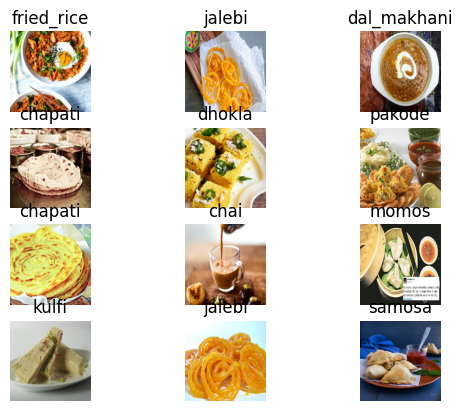

In [ ]:
for images,labels in train_ds.take(1) :
  for i in range(12) :
    plt.subplot(4,3,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(classes[labels[i].numpy()])
    plt.axis(False)




**Scaling the data**

In [ ]:
def preprocess(image, label) :
  image=tf.cast(image/255.,tf.float32)
  return image,label


In [ ]:
train_ds=train_ds.map(preprocess)
validation_ds=validation_ds.map(preprocess)

In [ ]:
for image,label in train_ds.take(1) :
  print(image[0].numpy())
  print(label[0].numpy())


[[[0.99607843 0.95686275 0.7551821 ]
  [0.99607843 0.95686275 0.7551821 ]
  [0.99559695 0.95638126 0.7547006 ]
  ...
  [0.99607843 0.9607843  0.65882355]
  [0.99607843 0.9607843  0.6511042 ]
  [0.99607843 0.9607843  0.6509804 ]]

 [[0.99607843 0.9529412  0.77254903]
  [0.99607843 0.9529412  0.77254903]
  [0.99607843 0.9529412  0.77254903]
  ...
  [0.99607843 0.9647059  0.64705884]
  [0.99607843 0.9607843  0.6509804 ]
  [0.99607843 0.9607843  0.6509804 ]]

 [[1.         0.95686275 0.7764706 ]
  [1.         0.95686275 0.7764706 ]
  [0.9995185  0.95638126 0.7759891 ]
  ...
  [0.99215686 0.9607843  0.63529414]
  [0.99607843 0.9610732  0.6506915 ]
  [0.99215686 0.95686275 0.64705884]]

 ...

 [[0.9608737  0.9412659  0.9255796 ]
  [0.9605161  0.94090825 0.925222  ]
  [0.9546314  0.93502355 0.9193373 ]
  ...
  [0.9762247  0.9566169  0.9409306 ]
  [0.97226876 0.9526609  0.93697464]
  [0.9764706  0.95686275 0.9411765 ]]

 [[0.96068805 0.9410802  0.92539394]
  [0.95341575 0.9338079  0.91812164]


In [ ]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications import ResNet50

**Dowloading ResNet pretrained model with imagenet weights and removing full connected neural network**

In [ ]:
base_model=ResNet50(weights='imagenet',
                 input_shape=(224,224,3),
                 include_top=False)

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
for i in base_model.layers:
  print(i.name)

input_1
conv1_pad
conv1_conv
conv1_bn
conv1_relu
pool1_pad
pool1_pool
conv2_block1_1_conv
conv2_block1_1_bn
conv2_block1_1_relu
conv2_block1_2_conv
conv2_block1_2_bn
conv2_block1_2_relu
conv2_block1_0_conv
conv2_block1_3_conv
conv2_block1_0_bn
conv2_block1_3_bn
conv2_block1_add
conv2_block1_out
conv2_block2_1_conv
conv2_block2_1_bn
conv2_block2_1_relu
conv2_block2_2_conv
conv2_block2_2_bn
conv2_block2_2_relu
conv2_block2_3_conv
conv2_block2_3_bn
conv2_block2_add
conv2_block2_out
conv2_block3_1_conv
conv2_block3_1_bn
conv2_block3_1_relu
conv2_block3_2_conv
conv2_block3_2_bn
conv2_block3_2_relu
conv2_block3_3_conv
conv2_block3_3_bn
conv2_block3_add
conv2_block3_out
conv3_block1_1_conv
conv3_block1_1_bn
conv3_block1_1_relu
conv3_block1_2_conv
conv3_block1_2_bn
conv3_block1_2_relu
conv3_block1_0_conv
conv3_block1_3_conv
conv3_block1_0_bn
conv3_block1_3_bn
conv3_block1_add
conv3_block1_out
conv3_block2_1_conv
conv3_block2_1_bn
conv3_block2_1_relu
conv3_block2_2_conv
conv3_block2_2_bn
conv3_

**Data Augmentation so that model does not over fit**

In [ ]:
data_augmentation=Sequential(
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
              tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
)
data_augmentation.add(keras.layers.experimental.preprocessing.RandomZoom(0.2))
data_augmentation.add(keras.layers.experimental.preprocessing.RandomHeight(0.2))
data_augmentation.add(keras.layers.experimental.preprocessing.RandomWidth(0.2))

**Building Model**

In [ ]:
model=Sequential()
data_augmentation,
model.add(base_model)
model.add(Flatten())
model.add(Dense(256,activation="relu",kernel_regularizer=keras.regularizers.l1(0.001)))
model.add(keras.layers.Dropout(0.4))
model.add(Dense(20,activation="softmax"))

In [ ]:
call_backs=tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    min_delta=0,
    patience=3,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0,
)

In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],

  )

**Training Model**

In [ ]:
history = model.fit(train_ds,epochs=100,validation_data=validation_ds,callbacks=call_backs)

Epoch 1/100
157/157 [==============================] - 178s 739ms/step - loss: 100.1667 - accuracy: 0.2422 - val_loss: 98.9717 - val_accuracy: 0.0455
Epoch 2/100
157/157 [==============================] - 104s 638ms/step - loss: 94.3906 - accuracy: 0.6810 - val_loss: 94.8302 - val_accuracy: 0.0646
Epoch 3/100
157/157 [==============================] - 106s 660ms/step - loss: 89.2504 - accuracy: 0.8772 - val_loss: 89.5935 - val_accuracy: 0.1516
Epoch 4/100
157/157 [==============================] - 103s 642ms/step - loss: 84.0604 - accuracy: 0.9402 - val_loss: 83.7758 - val_accuracy: 0.3488
Epoch 5/100
157/157 [==============================] - 99s 602ms/step - loss: 78.6244 - accuracy: 0.9707 - val_loss: 77.5152 - val_accuracy: 0.5204
Epoch 6/100
157/157 [==============================] - 98s 609ms/step - loss: 72.9100 - accuracy: 0.9829 - val_loss: 70.9870 - val_accuracy: 0.7023
Epoch 7/100
157/157 [==============================] - 102s 628ms/step - loss: 67.0096 - accuracy: 0.9844 -

**Visuvalizing results**

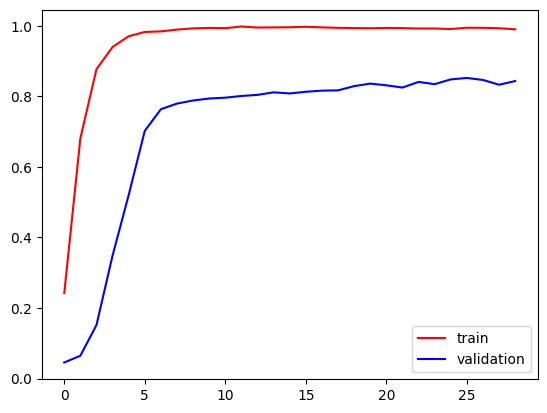

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
history = model.fit(train_ds,epochs=30,validation_data=validation_ds,initial_epoch=history.epoch[-1])

NameError: ignored

In [ ]:

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

**Saving the model**

In [ ]:
model.save('model.keras')